In [97]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [98]:
datasets.cifar10.load_data()

((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [99]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape


(50000, 32, 32, 3)

In [100]:
x_test.shape

(10000, 32, 32, 3)

In [101]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [103]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [52]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [104]:
classes[9]

'truck'

In [105]:
def plot_sample(x, y, index):
    plt.figure(figsize = (20,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

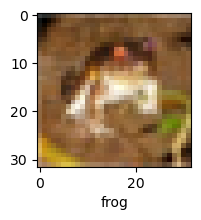

In [106]:
plot_sample(x_train, y_train, 0)

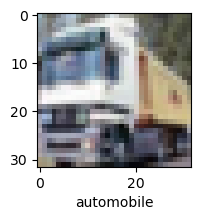

In [67]:
plot_sample(x_train, y_train, 1)

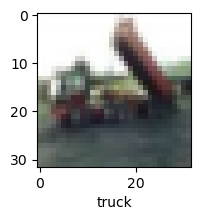

In [107]:
plot_sample(x_train, y_train, 2)

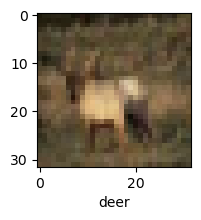

In [108]:
plot_sample(x_train, y_train, 3)

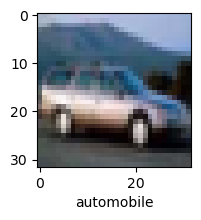

In [109]:
plot_sample(x_train, y_train, 4)

In [110]:
x_train = x_train / 255
x_test = x_test / 255

In [111]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.3012 - loss: 1.9284
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.4204 - loss: 1.6465
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4510 - loss: 1.5617
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.4793 - loss: 1.4844
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.4951 - loss: 1.4358


In [112]:
ann.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4626 - loss: 1.4834


[1.4880375862121582, 0.4593000113964081]

In [114]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report:\n", classification_report(y_test, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.40      0.48      1000
           1       0.57      0.57      0.57      1000
           2       0.42      0.22      0.29      1000
           3       0.36      0.26      0.30      1000
           4       0.36      0.55      0.44      1000
           5       0.38      0.41      0.40      1000
           6       0.60      0.42      0.49      1000
           7       0.63      0.47      0.54      1000
           8       0.37      0.85      0.52      1000
           9       0.59      0.45      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.49      0.46      0.45     10000
weighted avg       0.49      0.46      0.45     10000



In [123]:
cnn = models.Sequential([

    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [126]:
cnn.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [128]:
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3590 - loss: 1.7521
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.5615 - loss: 1.2326
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6172 - loss: 1.0902
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6425 - loss: 1.0079
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6666 - loss: 0.9560
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6818 - loss: 0.9068
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6973 - loss: 0.8662
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7156 - loss: 0.8216
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7271 - loss: 0.7898
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7356 - loss: 0.7595


In [129]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6898 - loss: 0.9350


[0.9396482706069946, 0.6855999827384949]

In [132]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

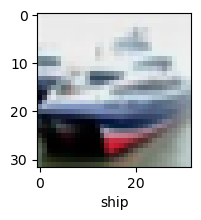

In [133]:
plot_sample(x_test, y_test, 1)

In [135]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[1.96961667e-02, 2.57039536e-02, 9.46486555e-03, 5.84107220e-01,
        2.94103450e-03, 2.14007273e-01, 1.24763191e-01, 4.56569687e-04,
        1.80020668e-02, 8.57596286e-04],
       [5.06583005e-02, 1.77360345e-02, 8.27922850e-06, 1.14623881e-05,
        1.93852266e-05, 7.38091614e-08, 2.69922225e-07, 3.16968425e-07,
        9.29948926e-01, 1.61692908e-03],
       [1.53321460e-01, 3.79362613e-01, 3.17837158e-03, 2.39577773e-03,
        5.21309534e-03, 1.10859903e-04, 1.03782455e-04, 1.75676390e-03,
        4.41884249e-01, 1.26730334e-02],
       [7.71784723e-01, 1.19303335e-02, 1.01356879e-02, 6.69000112e-03,
        5.09728771e-03, 3.89895067e-05, 3.07441107e-04, 8.14590021e-04,
        1.92518279e-01, 6.82651764e-04],
       [2.94292886e-06, 1.39820797e-04, 1.29346084e-03, 7.08480645e-03,
        7.74430811e-01, 3.91414715e-03, 2.12255478e-01, 9.46843284e-06,
        8.63219728e-04, 5.87646628e-06]], dtype=float32)

In [138]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [139]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

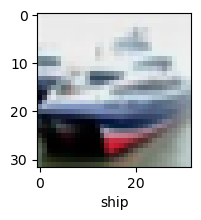

In [140]:
plot_sample(x_test, y_test, 1)

In [141]:
classes[y_classes[1]]

'ship'

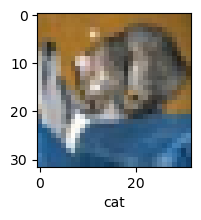

In [142]:
plot_sample(x_test, y_test, 0)

In [145]:
classes[y_classes[0]]

'cat'

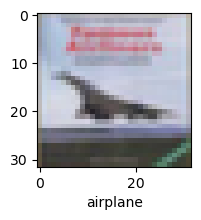

In [146]:
plot_sample(x_test, y_test, 3)

In [149]:
print("Classification Report:\n", classification_report(y_test, y_classes))


Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.78      0.73      1000
           1       0.76      0.83      0.79      1000
           2       0.70      0.47      0.56      1000
           3       0.58      0.41      0.48      1000
           4       0.62      0.61      0.62      1000
           5       0.56      0.65      0.60      1000
           6       0.72      0.81      0.76      1000
           7       0.69      0.76      0.72      1000
           8       0.80      0.76      0.78      1000
           9       0.70      0.79      0.74      1000

    accuracy                           0.69     10000
   macro avg       0.68      0.69      0.68     10000
weighted avg       0.68      0.69      0.68     10000

